## Observations and Insights 

In [42]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [43]:
# Combine the data into a single dataset
combined_dataset = pd.merge(mouse_metadata, study_results, how="outer", on="Mouse ID" )


# Display the data table for preview
combined_dataset

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [44]:
# Checking the number of mice.
combined_dataset["Mouse ID"].value_counts()


g989    13
a401    10
q511    10
p136    10
g791    10
        ..
u153     1
h428     1
x226     1
b447     1
n482     1
Name: Mouse ID, Length: 249, dtype: int64

In [45]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_dataset[combined_dataset.duplicated(["Mouse ID", "Timepoint"])]

duplicate_mice


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [46]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicate_mice_id = combined_dataset.set_index("Mouse ID")
duplicate_mice_id.loc["g989"]

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,5,48.786801,0
g989,Propriva,Female,21,26,5,47.570392,0
g989,Propriva,Female,21,26,10,51.745156,0
g989,Propriva,Female,21,26,10,49.880528,0
g989,Propriva,Female,21,26,15,51.325852,1
g989,Propriva,Female,21,26,15,53.442020,0
g989,Propriva,Female,21,26,20,55.326122,1


In [47]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mice_df = duplicate_mice_id.drop(["g989"])

In [48]:
# Checking the number of mice in the clean DataFrame.
len(clean_mice_df)

1880

## Summary Statistics

In [49]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor_volume = clean_mice_df.groupby(["Drug Regimen"])

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
tumor_mean = tumor_volume ["Tumor Volume (mm3)"].mean()
tumor_median = tumor_volume ["Tumor Volume (mm3)"].median()
tumor_variance = tumor_volume ["Tumor Volume (mm3)"].var()
tumor_stdev = tumor_volume ["Tumor Volume (mm3)"].std()
tumor_sem = tumor_volume ["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary dataframe.
summary_dataframe_table = pd.DataFrame ({"Mean":tumor_mean, "Median":tumor_median, "Variance":tumor_variance, "Standard Deviation":tumor_stdev, "SEM":tumor_sem})

summary_dataframe_table

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [50]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line - had to rename the columns w stems 

summary_dataframe_table2 = clean_mice_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_dataframe_table2

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

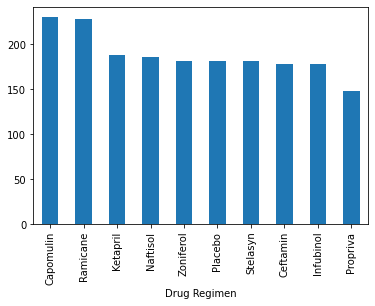

In [51]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

pandas_timepoint = clean_mice_df.groupby(['Drug Regimen'])['Timepoint'].count()

pandas_timepoint.sort_values(ascending=False).plot.bar()


plt.show()

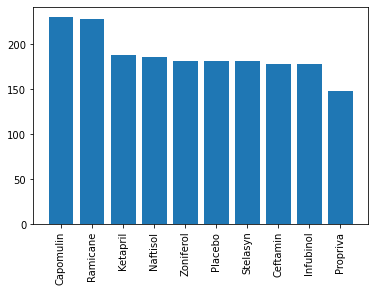

In [52]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

pyplot_timepoint = pandas_timepoint.sort_values(ascending=False)
plt.bar(pyplot_timepoint.index,pyplot_timepoint.values)

# Rotate the x values
plt.xticks(rotation='vertical') # this is to rotate the x values


plt.show()


<AxesSubplot:ylabel='Sex'>

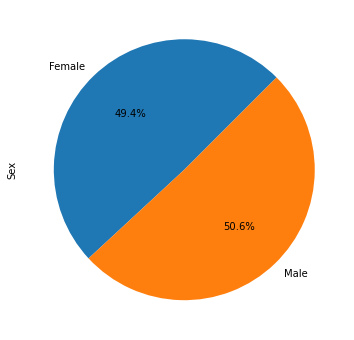

In [53]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

#ID by sex
sex = combined_dataset.groupby(['Sex'])["Sex"].count()

#Creat CHart
sex.plot.pie(startangle=45,autopct='%1.1f%%', figsize=(6, 6))

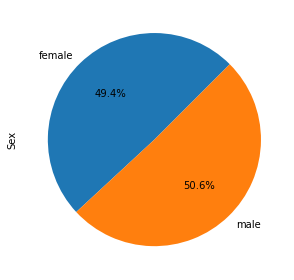

In [54]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex, labels=('female', 'male'), startangle=45, autopct='%1.1f%%')
plt.ylabel('Sex') 

# labeled the pie chart
plt.tight_layout() 

# used to make it look better
plt.show()

## Quartiles, Outliers and Boxplots

In [55]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# # Start by getting the last (greatest) timepoint for each mouse
last_timepoint = combined_dataset.groupby(['Mouse ID'])['Timepoint'].max()
last_timepoint_df = pd.DataFrame(last_timepoint)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
last_tp_df=pd.merge(combined_dataset, last_timepoint_df, on=('Mouse ID','Timepoint'), how='right')

last_tp_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1
2,a262,Placebo,Female,17,29,45,70.717621,4
3,a275,Ceftamin,Female,20,28,45,62.999356,3
4,a366,Stelasyn,Female,16,29,30,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,Propriva,Female,12,26,10,48.710661,0
245,z578,Ramicane,Male,11,16,45,30.638696,0
246,z581,Infubinol,Female,24,25,45,62.754451,3
247,z795,Naftisol,Female,13,29,45,65.741070,3


In [56]:
# Put treatments into a list for for loop (and later for plot labels)
treatments  = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_capo = []
tumor_rami = []
tumor_infu = []
tumor_ceft = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for index, row in last_tp_df.iterrows():
    
    
    
    # Locate the rows which contain mice on each drug and get the tumor volumes (last_tp_df)

    if row["Drug Regimen"] == 'Capomulin':
        tumor_capo.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == treatments[1]:
        tumor_rami.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == treatments[2]:
        tumor_infu.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == treatments[3]:
        tumor_ceft.append(row['Tumor Volume (mm3)'])
    # add subset 
    
meds = pd.DataFrame({"Capomulin": tumor_capo,
                       treatments[1]: tumor_rami,
                       treatments[2]: tumor_infu,
                       treatments[3]: tumor_ceft
                       })


    # Determine outliers using upper and lower bounds
meds_max = meds.max()
meds_min = meds.min()

meds

,Capomulin,Ramicane,Infubinol,Ceftamin
0,38.982878,38.407618,67.973419,62.999356
1,38.939633,43.047543,65.525743,45.000000
2,30.485985,38.810366,57.031862,56.057749
3,37.074024,32.978522,66.083066,55.742829
4,40.159220,38.342008,72.226731,48.722078
5,47.685963,33.397653,36.321346,47.784682
6,37.311846,37.311236,60.969711,61.849023
7,38.125164,40.659006,62.435404,68.923185
8,38.753265,29.128472,60.918767,67.748662
9,41.483008,33.562402,67.289621,57.918381


In [67]:
# Determine outliers using upper and lower bounds - I used quartiles
quart_capo = meds[treatments[0]].quantile([.25, .5, .75])
low_capo = quart_capo[.25]
med_capo = quart_capo[.5]
up_capo = quart_capo[.75]
iqr_capo = up_capo-low_capo
lowb_capo = low_capo - (1.5*iqr_capo)
upb_capo = up_cap + (1.5*iqr_capo)
max_capo = meds[treatments[0]].max()
min_capo = meds[treatments[0]].min()

quart_rami = meds['Ramicane'].quantile([.25, .5, .75])
low_rami = quart_rami[.25]
med_rami = quart_rami[.5]
up_rami = quart_rami[.75]
iqr_rami = up_rami-low_rami
lowb_rami = low_rami - (1.5*iqr_ram)
upb_rami = up_rami + (1.5*iqr_ram)
max_rami = meds[treatments[1]].max()
min_rami = meds[treatments[1]].min()

quart_infu = meds[treatments[2]].quantile([.25, .5, .75])
low_infu = quart_infu[.25]
med_infu = quart_infu[.5]
up_infu = quart_infu[.75]
iqr_infu = up_infu-low_infu
lowb_infu = low_infu - (1.5*iqr_infu)
upb_infu = up_infu + (1.5*iqr_infu)
max_infu = meds[treatments[2]].max()
min_infu = meds[treatments[2]].min()

quart_ceft = meds[treatments[3]].quantile([.25, .5, .75])
low_ceft = quart_ceft[.25]
med_ceft = quart_ceft[.5]
up_ceft = quart_ceft[.75]
iqr_ceft = up_ceft-low_ceft
lowb_ceft = low_cef - (1.5*iqr_ceft)
upb_ceft = up_cef + (1.5*iqr_ceft)
max_ceft = meds[treatments[3]].max()
min_ceft = meds[treatments[3]].min()

outliers = pd.DataFrame({'Drug': treatments,
                         'Lower Quartile':[low_capo, low_rami, low_infu, low_ceft],
                         'Upper Quartile':[up_capo, up_rami, up_infu, up_ceft],
                         'IQR':[iqr_capo, iqr_rami, iqr_inf, iqr_ceft],
                         'Median':[med_capo, med_rami, med_infu, med_ceft],
                        'Upper Bound': [upb_capo, upb_rami, upb_infu, upb_ceft],
                        'Lower Bound': [lowb_capo, lowb_rami, lowb_infu, lowb_ceft],
                        'Maximum': [max_capo, max_rami, max_inf, max_ceft],
                         'Minimum': [min_capo, min_rami, min_infu, min_ceft]
                        })
outliers
outliers_group = outliers.groupby('Drug')
outliers_group.sum()


    

,Lower Quartile,Upper Quartile,IQR,Median,Upper Bound,Lower Bound,Maximum,Minimum
Drug,,,,,,,,
Capomulin,32.377357,40.159220,7.781863,38.125164,51.832015,20.704562,47.685963,23.343598
Ceftamin,48.722078,64.299830,15.577752,59.851956,87.666458,25.355450,68.923185,45.000000
Infubinol,54.048608,65.525743,11.477135,60.165180,82.741446,36.832905,72.226731,36.321346
Ramicane,31.560470,40.659006,9.098537,36.561652,54.306811,17.912664,45.220869,22.050126


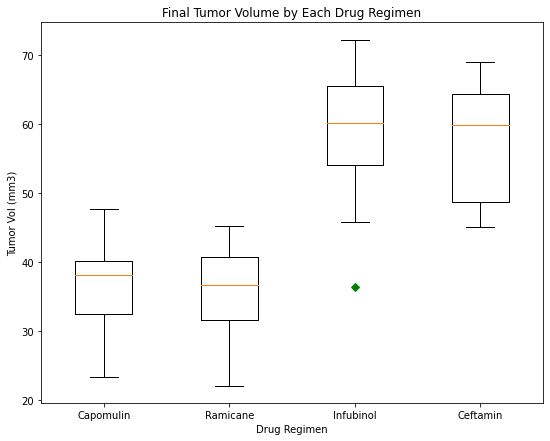

In [71]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
boxplot = [meds[treatments[0]],
                meds[treatments[1]],
                meds[treatments[2]],
                meds[treatments[3]]
               ]
                                               
#Define size
fig1, ax = plt.subplots(figsize=(9,7))
                                               
#Title                                               
ax.set_title('Final Tumor Volume by Each Drug Regimen') 
                                               
#X
ax.set_xlabel('Drug Regimen') 
#Y 
ax.set_ylabel('Tumor Vol (mm3)')   
                                               
# used ax.boxplot function and ran the parameter boxplot_list to create the boxplot
ax.boxplot(boxplot, 0, 'gD')
plt.xticks([1,2,3,4], treatments) 
                                               
 # set labels of each boxplot
plt.savefig('boxplot')
plt.show()                                               
                                               

## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
